### Parte 1

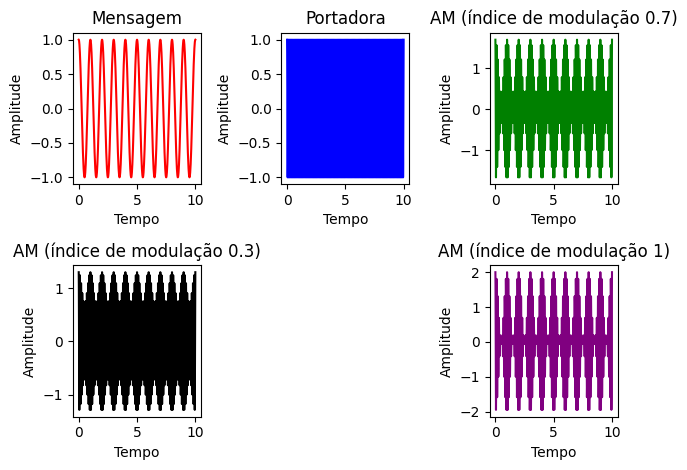

In [19]:
import numpy as np; # importando a biblioteca numpy como np
import matplotlib.pyplot as plt; # importando a biblioteca matplot.pyplot como plt

A_p = 1; # amplitude da portadora
f_p = 10; # frequência da portadora
f_m = 1; # frequência da mensagem
m = 0.7; # índice de modulação
t_max = 10; # tempo
fs = 100; # frequência de amostragem

x = np.linspace(0, t_max, t_max * fs + 1); # criando a quandidade de pontos no tempo necessarios
portadora = np.cos(2 * np.pi * f_p * x); # criando sinal da portadora
mensagem = np.cos(2 * np.pi * f_m * x); # criando sinal da mensagem
am = (A_p + A_p * m * mensagem) * portadora; # criando sinal am com indice de modulacao 0.7
am03 = (A_p + A_p * 0.3 * mensagem) * portadora; # criando sinal am com indice de modulacao 0.3
am1 = (A_p + A_p * 1 * mensagem) * portadora; # criando sinal am com indice de modulacao 1

plt.subplot(2, 3, 1); # definindo nº de linhas, nº de colunas e index do grafico da mensagem
plt.plot(x, mensagem, 'red'); # definindo valores do eixo "x" = x e "y" = mensagem e a cor da linha do grafico da mensagem
plt.xlabel("Tempo"); # definindo descrição para o eixo x
plt.ylabel("Amplitude"); # definindo descrição para o eixo y
plt.title("Mensagem"); # definindo título para o gráfico da mensagem

plt.subplot(2, 3, 2); # definindo nº de linhas, nº de colunas e index do grafico da portadora
plt.plot(x, portadora, 'blue'); # definindo valores do eixo "x" = x e "y" = portadora e a cor da linha do grafico da portadora
plt.xlabel("Tempo"); # definindo descrição para o eixo x
plt.ylabel("Amplitude"); # definindo descrição para o eixo y
plt.title("Portadora"); # definindo título para o gráfico da portadora

plt.subplot(2, 3, 3); # definindo nº de linhas, nº de colunas e index do grafico da am (m = 0.7)
plt.plot(x, am, 'green'); # definindo valores do eixo "x" = x e "y" = am e a cor da linha do grafico da am (m = 0.7)
plt.xlabel("Tempo"); # definindo descrição para o eixo x
plt.ylabel("Amplitude"); # definindo descrição para o eixo y
plt.title("AM (índice de modulação 0.7)"); # definindo título para o gráfico da am (m = 0.7)

plt.subplot(2, 3, 4); # definindo nº de linhas, nº de colunas e index do grafico da am (m = 0.3)
plt.plot(x, am03, 'black'); # definindo valores do eixo "x" = x e "y" = am03 e a cor da linha do grafico da am (m = 0.3)
plt.xlabel("Tempo"); # definindo descrição para o eixo x
plt.ylabel("Amplitude"); # definindo descrição para o eixo y
plt.title("AM (índice de modulação 0.3)"); # definindo título para o gráfico da am (m = 0.3)

plt.subplot(2, 3, 6); # definindo nº de linhas, nº de colunas e index do grafico da am (m = 1)
plt.plot(x, am1, 'purple'); # definindo valores do eixo "x" = x e "y" = am1 e a cor da linha do grafico da am (m = 1)
plt.xlabel("Tempo"); # definindo descrição para o eixo x
plt.ylabel("Amplitude"); # definindo descrição para o eixo y
plt.title("AM (índice de modulação 1)"); # definindo título para o gráfico da am (m = 1)

plt.tight_layout(); # ajustando layout dos gráficos para caber todos na imagem

### Parte 2

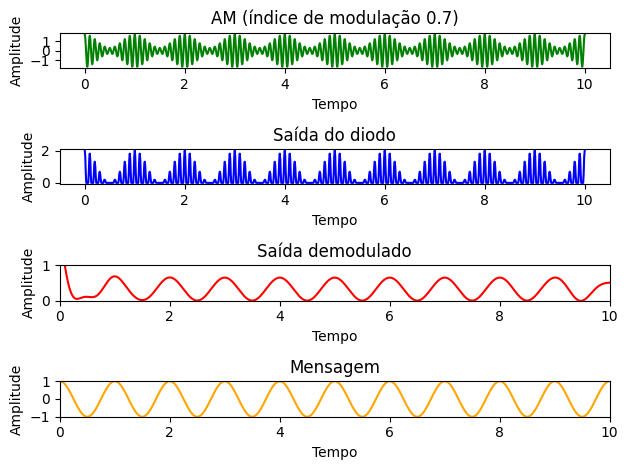

In [42]:

# saída do diodo
diodo = am1.copy();
diodo[diodo<0] = 0;

# um filtro com frequencia de corte em 2Hz é usado na saída do diodo
from scipy.signal import butter, filtfilt;
b, a = butter(10, 2/(fs*0.5), btype='low', analog=False);
signal_demodulado = filtfilt(b, a, diodo);

plt.subplot(4, 1, 1); # definindo nº de linhas, nº de colunas e index do grafico da am (m = 0.7)
plt.plot(x, am, 'green'); # definindo valores do eixo "x" = x e "y" = am e a cor da linha do grafico da am (m = 0.7)
plt.xlabel("Tempo"); # definindo descrição para o eixo x
plt.ylabel("Amplitude"); # definindo descrição para o eixo y
plt.title("AM (índice de modulação 0.7)"); # definindo título para o gráfico da am (m = 0.7)

plt.subplot(4, 1, 2); # definindo nº de linhas, nº de colunas e index do grafico da saida do diodo
plt.plot(x, diodo, 'blue'); # definindo valores do eixo "x" = x e "y" = diodo e a cor da linha do grafico da saida do diodo
plt.xlabel("Tempo"); # definindo descrição para o eixo x
plt.ylabel("Amplitude"); # definindo descrição para o eixo y
plt.title("Saída do diodo"); # definindo título para o gráfico da saida do diodo

plt.subplot(4, 1, 3); # definindo nº de linhas, nº de colunas e index do grafico do sinal demodulado
plt.plot(x, signal_demodulado, 'red'); # definindo valores do eixo "x" = x e "y" = signal_demodulado e a cor da linha do grafico do sinal demodulado
plt.xlabel("Tempo"); # definindo descrição para o eixo x
plt.ylabel("Amplitude"); # definindo descrição para o eixo y
plt.title("Saída demodulado"); # definindo título para o gráfico do sinal demodulado
ax3 = plt.subplot(4, 1, 3); # atribuindo o grafico a uma variavel para definir limites do grafico
ax3.set_xlim([0, 10]); # atribuindo limites para o eixo x do grafico
ax3.set_ylim([0, 1]); # atribuindo limites para o eixo y do grafico

plt.subplot(4, 1, 4); # definindo nº de linhas, nº de colunas e index do grafico mensagem
plt.plot(x, mensagem, 'orange'); # definindo valores do eixo "x" = x e "y" = mensagem e a cor da linha do grafico mensagem
plt.xlabel("Tempo"); # definindo descrição para o eixo x
plt.ylabel("Amplitude"); # definindo descrição para o eixo y
plt.title("Mensagem"); # definindo título para o gráfico mensagem
ax4 = plt.subplot(4, 1, 4); # atribuindo o grafico a uma variavel para definir limites do grafico
ax4.set_xlim([0, 10]); # atribuindo limites para o eixo x do grafico
ax4.set_ylim([-1, 1]); # atribuindo limites para o eixo y do grafico

plt.tight_layout(); # ajustando layout dos gráficos para caber todos na imagem

# o sinal demodulado foi "comprimido" entre 0 e 1 enquanto a mensagem possui um range entre -1 e 1